In [1]:
import csv
import argparse
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression

In [3]:
batting_data_path = 'bsb_ref.csv'
# INFO:
# 101,332 Players with up to 20 features each (exluding year, including team)
# if metric not reported for player, set to 0.0 by default

df = pd.read_csv(batting_data_path)
# df = df.fillna(0)

In [6]:
# focusing on players after 1975
df_recent_players = df[df.year_ID >= 1975] #48k players

# find players with the highest number of years 
players = list(set(df_recent_players['name_common'])) # just a set of all players

# sorting by number of years active
sorted_players = sorted(players, key=lambda player: len(df_recent_players[df_recent_players['name_common'] == player]), reverse=True)




In [27]:
import random
# select 10 random players from the top 50 players in terms of number of years available
sample = random.sample(range(0, 50), 10)
players_to_analyze = [sorted_players[i] for i in sample]

print(df_recent_players[df_recent_players['name_common'] == player])




Score for Jose Bautista = 0.6324748477747502
Score for Julio Franco = 0.04733417368252868
Score for Sandy Alomar = 0.0011462722142744353
Score for Tim Raines = 0.023069870837196582
Score for Tony Pena = 0.6437804839836097
Score for Edwin Jackson = 0.07634095176919298
Score for Roberto Hernandez = 0.2594500675973328
Score for Jose Cruz = 0.29428981615349736
Score for Chris Young = 0.05244119926897528
Score for Harold Baines = 0.09793342000875961


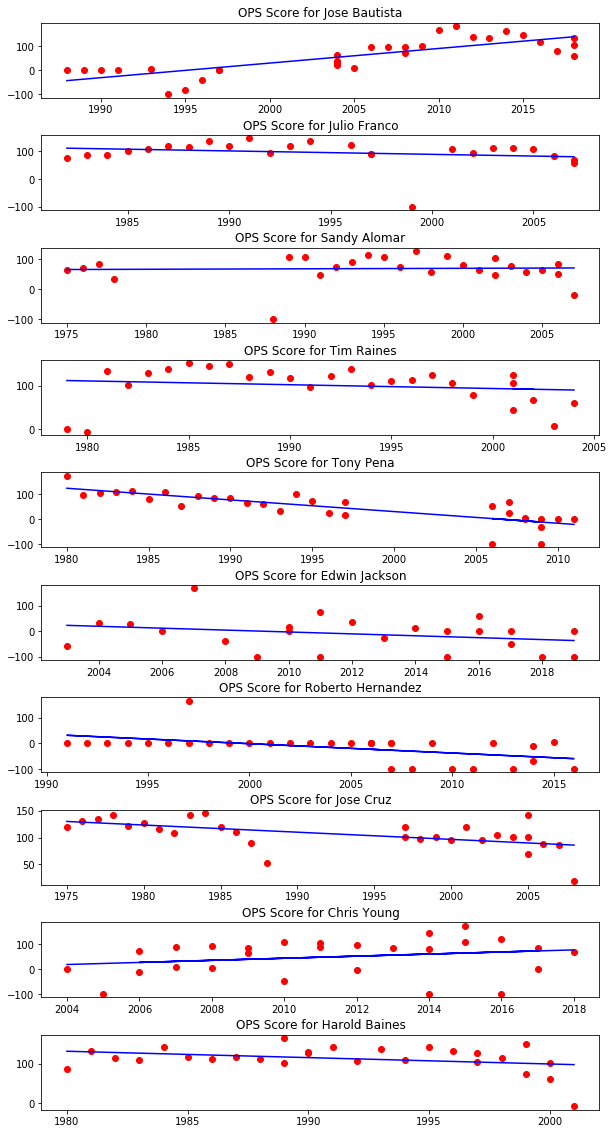

In [54]:
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression

fig, axs = plot.subplots(len(players_to_analyze), figsize=(10,20))
fig.subplots_adjust(hspace=.5)



for i, player in enumerate(players_to_analyze):
    ops_correlation = []
    # a list of all rows pertaining to a player
    player_stats = df_recent_players[df_recent_players['name_common'] == player]
    x_data = player_stats['year_ID'].values.reshape(-1,1)
    y_data = player_stats['OPS_plus'].values.reshape(-1,1)

    linearRegressor = LinearRegression()
    linearRegressor.fit(x_data, y_data)    
    print('Score for ' + player + ' = ' + str(linearRegressor.score(x_data, y_data)))
    


    axs[i].scatter(x_data, y_data, color = 'red')
    axs[i].plot(x_data, linearRegressor.predict(x_data), color = 'blue')
    axs[i].set_title('OPS Score for '+ player)
#     axs[i].xlabel('OPS')
#     axs[i].ylabel('Year')
plot.show()
